In [83]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [86]:
(X_train, _), (X_test, _) = mnist.load_data()

In [87]:
X_train = (X_train / X_train.max()).astype(float)
X_test =  (X_test / X_test.max()).astype(float)

In [118]:
X_test_noisy = X_test + np.random.normal(0, 1, X_test.shape)

In [89]:
X_train = X_train.reshape(X_train.shape[0], 28*28)

In [109]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (28*28,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10,  activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(28*28, activation = 'relu'))

In [110]:
model.compile(loss = 'MSE',
              optimizer = 'adam',
              metrics = ['mean_squared_error'])

In [111]:
model.fit(X_train, X_train,
          batch_size = 32,
          epochs = 10,
          validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 7/10
1688/

1/1 [==============================] - 0s 15ms/step


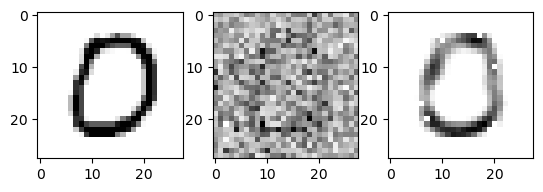

In [122]:
_, axs = plt.subplots(1, 3)

k = 10
axs[0].imshow(X_test[k].reshape(28,28), cmap = 'Greys')
axs[1].imshow(X_test_noisy[k].reshape(28,28), cmap = 'Greys')
axs[2].imshow(model.predict(X_test_noisy[k].reshape(1, 28*28)).reshape(28, 28), cmap = 'Greys')